In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
## import house price data from sklearn datasets
boston = datasets.load_boston()
names = boston.feature_names

bos = pd.DataFrame(boston.data)
bos.columns = names
bos.head() # display the first five rows

/Users/zijun/Documents/anaconda3/envs/class/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
target = boston.target  # price variable we want to predict
bos['PRICE'] = target #create a new column with target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

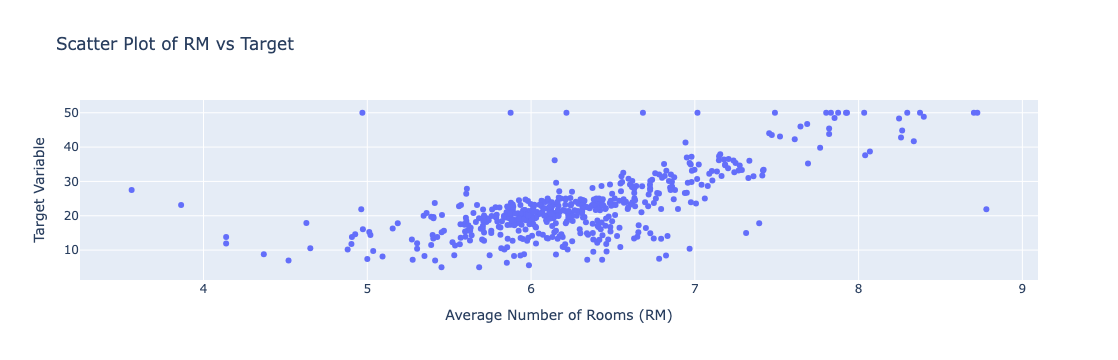

In [18]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Initialize Plotly in offline mode
init_notebook_mode(connected=True)

trace = go.Scatter(x = bos.RM, y=target, mode='markers')

# Define layout with axis labels
layout = go.Layout(
    title="Scatter Plot of RM vs Target",
    xaxis=dict(title="Average Number of Rooms (RM)"),
    yaxis=dict(title="Target Variable")
)

# Combine trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Display the plot
iplot(fig)

In [11]:
# as the number of rooms increase, the price of the house increases

# perform a linear regression
# normalizing
from sklearn import preprocessing

bos_new = bos
del bos_new['PRICE']
val = bos_new.values
min_max_scaler = preprocessing.MinMaxScaler()
val_scaled = min_max_scaler.fit_transform(val)
bos_norm = pd.DataFrame(val_scaled,columns=bos.columns)
bos_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [12]:
from sklearn.model_selection import train_test_split
X= pd.DataFrame(bos_norm['RM'],columns=['RM'])
y= target #This is the price column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [13]:
from sklearn import linear_model
lr = linear_model.LinearRegression() 
lr.fit(X_train,y_train) #Fit the model on the training data

LinearRegression()

In [14]:
#Predict price on test data
predicted = lr.predict(X_test)
lr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
lr_predictions[:20]

,Actual,Predicted
0,28.4,25.179933
1,31.1,26.822325
2,23.5,22.270042
3,26.6,28.063045
4,19.6,14.361567
5,14.3,23.573245
6,50.0,32.972370
7,14.3,16.441335
8,20.7,18.967406
9,37.6,37.890620


In [15]:
#Actual vs predicted score
# coefficient of determination of the prediction
# R2 = (1-u/v), where 
# u is the residual sum of squares ((y_true - y_pred)** 2).sum() 
# v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()
# the higher the better; the highest/best possible value is 1
score = lr.score(X_test,y_test) 

#Mean squared error
mseFull = np.mean((y_test - lr.predict(X_test))**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)

Accuracy of model: 0.513277
Mean Squared Error: 48.520361


In [19]:
def draw_graph(df,title):
    #Plot of linear regerssion
    trace = go.Scatter(x=df['Actual'].values,
                       y=df['Predicted'].values,
                       mode ='markers')
    
    trace2 = go.Scatter(x = df['Actual'].values,
                        y = df['Actual'].values,
                        mode = 'lines',
                        name = 'lines'
                        )

    layout = go.Layout(
        title="%s" % title,
        xaxis=dict(
            title='Actual',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Predicted',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    data = [trace,trace2]
    fig = go.Figure(data=data,layout=layout)
    return iplot(fig)

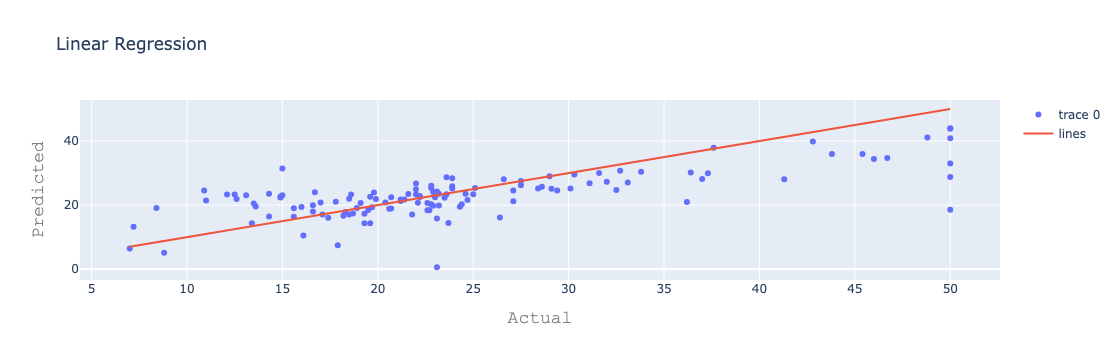

In [20]:
draw_graph(lr_predictions,'Linear Regression')

In [21]:
# Multiple Linear Regression
# A multiple linear regression is used to predict a target variable Y using two or more independent variables X1,X2,X3...

X= bos_norm
y= target #This is the price column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [22]:
mlr = linear_model.LinearRegression() 
#Fit the model on the training data
mlr.fit(X_train,y_train) 

LinearRegression()

In [23]:
#Predict price on test data 
predicted = mlr.predict(X_test)
mlr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
mlr_predictions[:20]

,Actual,Predicted
0,28.4,31.114396
1,31.1,31.820602
2,23.5,30.556206
3,26.6,22.440421
4,19.6,18.803988
5,14.3,16.276253
6,50.0,36.135344
7,14.3,14.624633
8,20.7,24.561962
9,37.6,37.279617


In [24]:
#Actual vs predicted score
score = mlr.score(X_test,y_test)
#Mean squared error
mseFull = np.mean((y_test - mlr.predict(X_test))**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)

Accuracy of model: 0.674559
Mean Squared Error: 32.442537


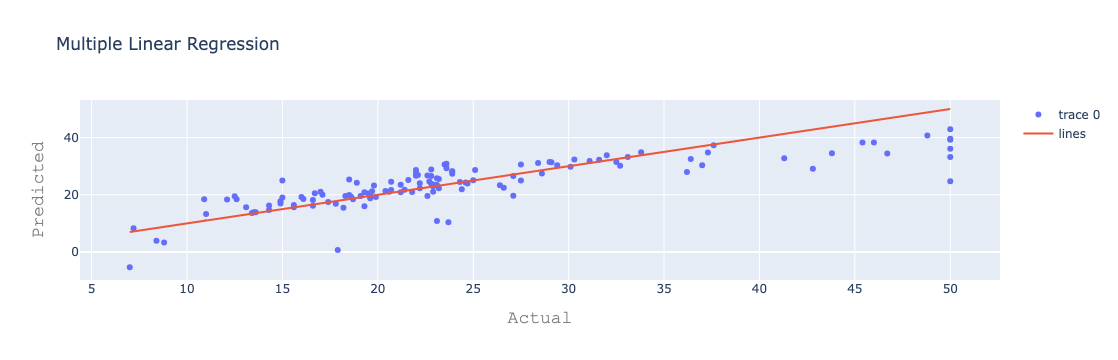

In [25]:
draw_graph(mlr_predictions,'Multiple Linear Regression')

In [27]:
# Decision tree algorithms are used in a similar way to linear regression with the end goal to predict a target variable. 
# Decision Trees are much better at predicting non-linear relationships but can also suffer from over fitting

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 10,
                            max_depth=13, 
                            min_samples_leaf=4,
                            min_samples_split=4,
                            max_features = 'auto')


dtr.fit(X_train, y_train)

predicted = dtr.predict(X_test)

dtr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})

dtr_predictions[:20]

/Users/zijun/Documents/anaconda3/envs/class/lib/python3.10/site-packages/sklearn/tree/_classes.py:306: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.



,Actual,Predicted
0,28.4,23.060000
1,31.1,32.775000
2,23.5,23.475000
3,26.6,26.785714
4,19.6,18.775000
5,14.3,16.171429
6,50.0,43.225000
7,14.3,16.400000
8,20.7,20.185714
9,37.6,49.750000


In [28]:
#Model score 
score = dtr.score(X_test,y_test)
mseFull = np.mean((y_test - predicted)**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)

Accuracy of model: 0.746294
Mean Squared Error: 25.291414


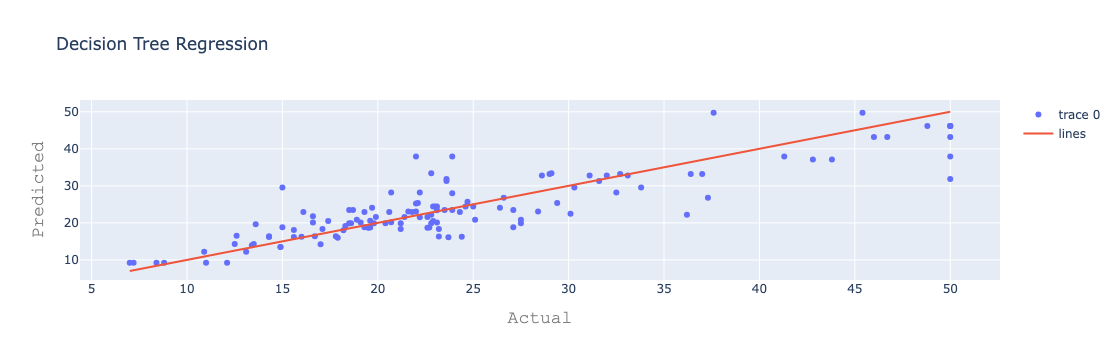

In [29]:
draw_graph(dtr_predictions,'Decision Tree Regression')

In [32]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor(random_state=10, 
                            max_depth=13, 
                            max_features='auto')

params = {'min_samples_split': range(2, 10, 2),
          'min_samples_leaf': range(2, 10, 2),
          'max_depth': range(1, 13)}
    
grid_search = GridSearchCV(dtr, param_grid=params, cv=10)
grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

predicted = grid_search.predict(X_test)

mseFull = np.mean((y_test - predicted)**2)

grid_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
score = grid_search.score(X_test, y_test)
print("predicted score against actual: %f" % score)
print("Mean Squared Error: %f" % mseFull)

grid_predictions.head()

Best score: 0.7758767442793008
Best parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
predicted score against actual: 0.762442
Mean Squared Error: 23.681619


,Actual,Predicted
0,28.4,22.063793
1,31.1,30.609091
2,23.5,23.755172
3,26.6,27.162500
4,19.6,20.043333


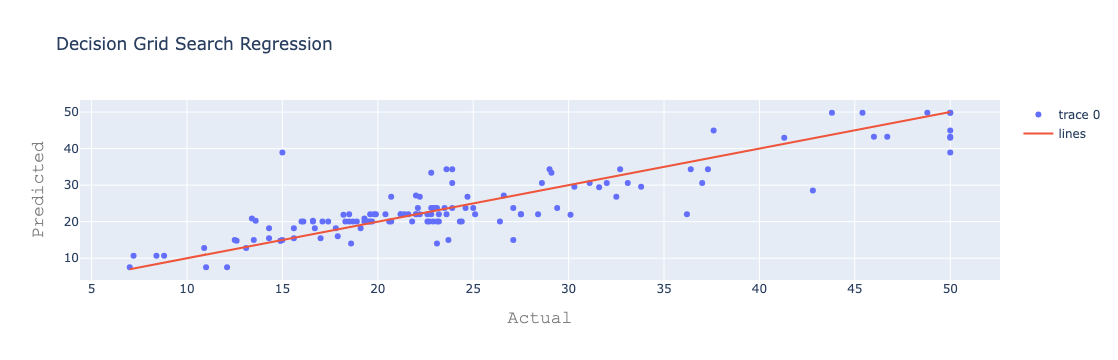

In [33]:
draw_graph(grid_predictions,'Decision Grid Search Regression')

In [34]:
#Random Forest
#A Random Forest as the name suggests is a collection of decision trees. 
#It randomly subsets the data and feeds it into decision trees, also sometimes referred to as 'bagging'. 
#This is particularly useful as decision trees are prone to overfitting

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 100, random_state = 10,oob_score=True,
                           max_depth=7, min_samples_leaf=3,min_samples_split=9,n_jobs=-1)


rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
rf_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
rf_score = rf.score(X_test,y_test)
print("predicted score against actual: %f" % rf_score)
rf_predictions.head()

predicted score against actual: 0.834797


,Actual,Predicted
0,28.4,25.333491
1,31.1,29.497785
2,23.5,26.325478
3,26.6,28.452893
4,19.6,20.946747


In [35]:
params ={'max_depth':range(9,13),
         'min_samples_leaf':range(1,3),
         'min_samples_split':range(2,10,2)
}
grid_search = GridSearchCV(rf,param_grid=params,cv=10)
grid_search.fit(X_train, y_train)


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

predicted = grid_search.predict(X_test)

grid_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
score = grid_search.score(X_test,y_test)
print("predicted score against actual: %f" % score)
grid_predictions.head()

Best score: 0.8431507935229563
Best parameters: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}
predicted score against actual: 0.861802


,Actual,Predicted
0,28.4,25.739281
1,31.1,29.650133
2,23.5,26.013621
3,26.6,28.474700
4,19.6,17.931524


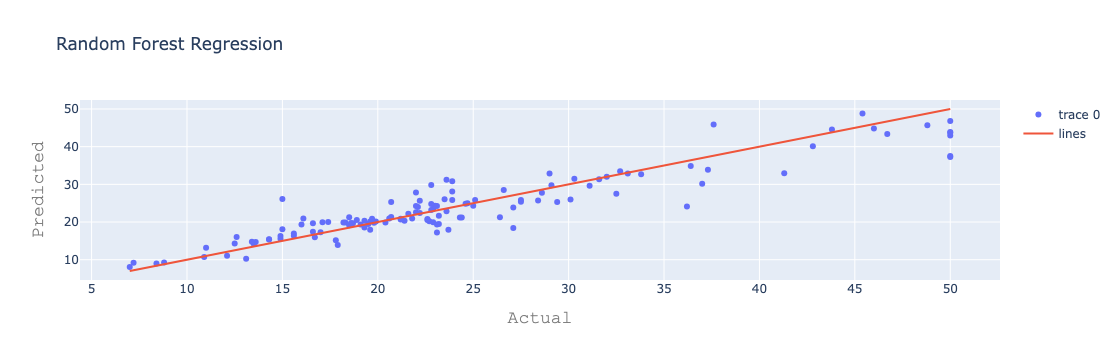

In [36]:
draw_graph(grid_predictions,'Random Forest Regression')

In [37]:
# Gradient Boosted Regression
# Gradient boosted regression functions in a similar way to a random forest. 
# Instead of creating x number of decision trees and aggregating them 
# a boosted learning algorithm will perform the same basic process of building a learning algorithm on samples of data 
# but will assign a higher and higher weight to a hard to classify observation.

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators= 100, 
                                random_state = 10,
                                max_depth=12, 
                                min_samples_leaf=4,
                                min_samples_split=4,
                                learning_rate=0.2)

gbr.fit(X_train, y_train)
predicted = gbr.predict(X_test)
gbr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
gbr_score = gbr.score(X_test,y_test)
print("predicted score against actual: %f" % gbr_score)
gbr_predictions.head()

predicted score against actual: 0.862393


,Actual,Predicted
0,28.4,25.104103
1,31.1,29.815745
2,23.5,25.429537
3,26.6,28.376858
4,19.6,21.289210


In [38]:
params ={'max_depth':range(1,5,2),
         'min_samples_leaf':range(1,5,2),
         'min_samples_split':range(2,4),
         'learning_rate':[0.1]
         }
grid_search = GridSearchCV(gbr,param_grid=params,cv=10)
grid_search.fit(X_train, y_train)


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

predicted = grid_search.predict(X_test)

grid_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
score = grid_search.score(X_test,y_test)
print("predicted score against actual: %f" % score)
grid_predictions.head()

Best score: 0.8722425141137371
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
predicted score against actual: 0.891742


,Actual,Predicted
0,28.4,26.288515
1,31.1,29.454421
2,23.5,25.595406
3,26.6,26.926590
4,19.6,19.326003


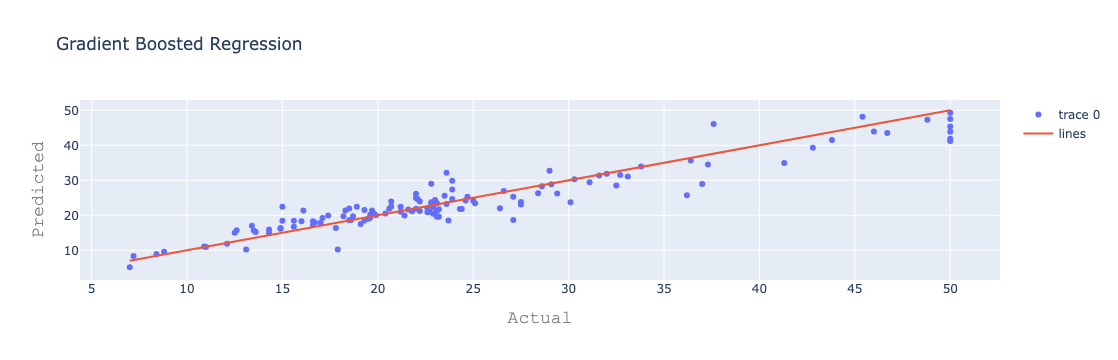

In [39]:
draw_graph(grid_predictions,'Gradient Boosted Regression')